<a href="https://colab.research.google.com/github/PurushottamMNagarkar/Predict-Fuel-Efficiency-Using-Tensorflow-in-Python/blob/main/Predict_Fuel_Efficiency_Using_Tensorflow_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('auto-mpg.csv')
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
df.shape

(398, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
df['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [11]:
print(df.shape)
df = df[df['horsepower'] != '?']
print(df.shape)

(398, 9)
(398, 9)


In [14]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')


In [15]:
print("Number of NaNs before conversion:", df['horsepower'].isnull().sum())

Number of NaNs before conversion: 6


In [20]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'].fillna(0, inplace=True)
df['horsepower'] = df['horsepower'].astype(int)
print("Number of NaNs after conversion:", df['horsepower'].isnull().sum())



Number of NaNs after conversion: 0


In [21]:
print("Number of NaNs after conversion:", df['horsepower'].isnull().sum())

Number of NaNs after conversion: 0


In [22]:
print("Number of NaNs before conversion:", df['horsepower'].isnull().sum())

Number of NaNs before conversion: 0


In [23]:
df['horsepower'] = df['horsepower'].astype(int)
df.isnull().sum()


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [24]:

df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model_year       13
origin            3
car_name        305
dtype: int64

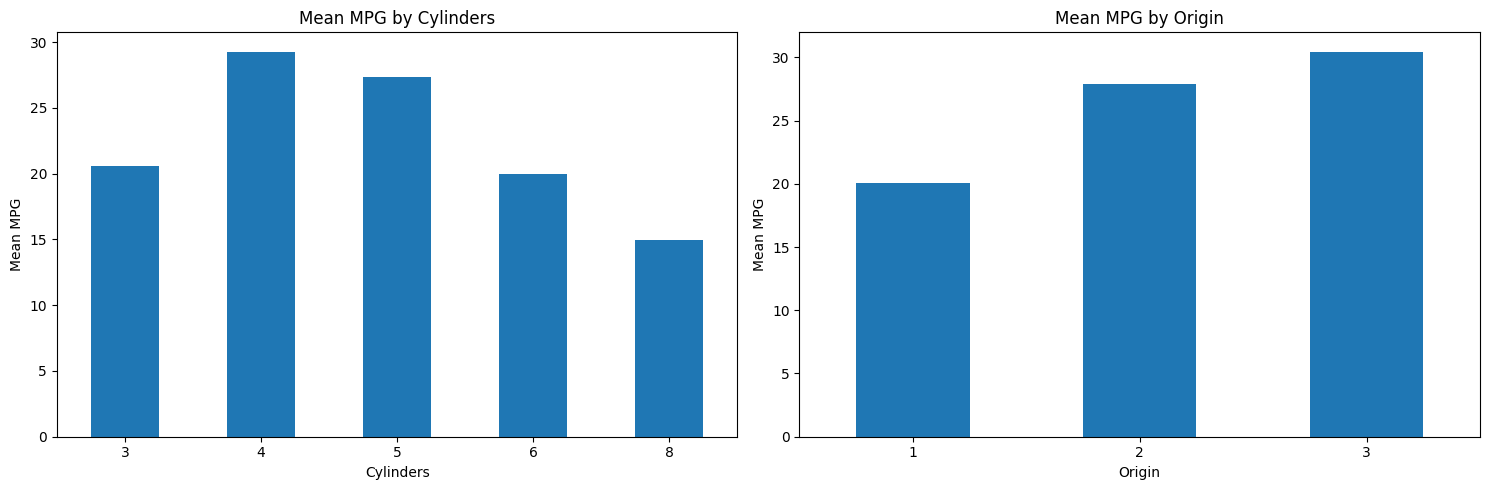

In [28]:
df['mpg'] = pd.to_numeric(df['mpg'], errors='coerce')
df['cylinders'] = pd.to_numeric(df['cylinders'], errors='coerce')
df['origin'] = pd.to_numeric(df['origin'], errors='coerce')

# Drop rows with NaN values in 'mpg', 'cylinders', or 'origin'
df.dropna(subset=['mpg', 'cylinders', 'origin'], inplace=True)

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, col in enumerate(['cylinders', 'origin']):
    ax = axes[i]
    x = df.groupby(col)['mpg'].mean()
    x.plot.bar(ax=ax)
    ax.set_title(f'Mean MPG by {col.capitalize()}')
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel('Mean MPG')
    ax.set_xticks(range(len(x)))
    ax.set_xticklabels(x.index, rotation=0)

plt.tight_layout()
plt.show()

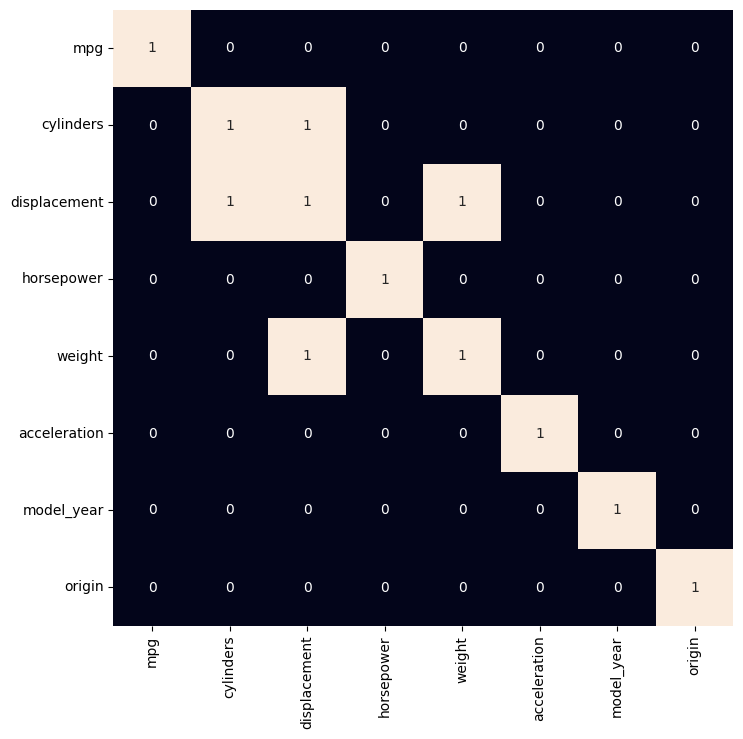

In [35]:
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Create a mask for correlations greater than 0.9
mask = corr_matrix > 0.9

# Plot the heatmap
plt.figure(figsize=(8, 8))
sb.heatmap(mask, annot=True, cbar=False)
plt.show()

In [36]:
df.drop('displacement',
		axis=1,
		inplace=True)


In [42]:
df['mpg'] = pd.to_numeric(df['mpg'], errors='coerce')

# Drop non-numeric columns
features = df.drop(['mpg', 'car_name'], axis=1)

# Convert remaining columns to numeric (if necessary)
features = features.apply(pd.to_numeric, errors='coerce')

# Ensure no NaNs in features (optional step: handle NaNs appropriately if needed)
features = features.dropna()

# Extract target values
target = df.loc[features.index, 'mpg'].values

# Split the data
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.2, random_state=22)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("Y_train shape:", Y_train.shape)
print("Y_val shape:", Y_val.shape)

X_train shape: (318, 6)
X_val shape: (80, 6)
Y_train shape: (318,)
Y_val shape: (80,)


In [43]:
AUTO = tf.data.experimental.AUTOTUNE

train_ds = (
	tf.data.Dataset
	.from_tensor_slices((X_train, Y_train))
	.batch(32)
	.prefetch(AUTO)
)

val_ds = (
	tf.data.Dataset
	.from_tensor_slices((X_val, Y_val))
	.batch(32)
	.prefetch(AUTO)
)


In [44]:
model = keras.Sequential([
	layers.Dense(256, activation='relu', input_shape=[6]),
	layers.BatchNormalization(),
	layers.Dense(256, activation='relu'),
	layers.Dropout(0.3),
	layers.BatchNormalization(),
	layers.Dense(1, activation='relu')
])


In [45]:
model.compile(
	loss='mae',
	optimizer='adam',
	metrics=['mape']
)


In [46]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69,889 (273.00 KB)

 Trainable params: 68,865 (269.00 KB)

 Non-trainable params: 1,024 (4.00 KB)

In [47]:
history = model.fit(train_ds,
					epochs=50,
					validation_data=val_ds)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 22.2087 - mape: 90.1597 - val_loss: 24.5947 - val_mape: 144.8315
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.1021 - mape: 77.6710 - val_loss: 18.1221 - val_mape: 104.8158
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 19.4429 - mape: 74.6885 - val_loss: 14.1703 - val_mape: 74.0178
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.9709 - mape: 72.3488 - val_loss: 12.5656 - val_mape: 57.8339
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.4258 - mape: 69.3096 - val_loss: 11.8414 - val_mape: 50.3582
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.9900 - mape: 67.2711 - val_loss: 11.3634 - val_mape: 45.3673
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.4872 - mape: 65.0040 - val_loss: 10.8291 - val_mape: 42.7032
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.1036 - mape: 63.5569 - val_loss: 10.3630 - val_mape: 38.8111
Epoch 9/50
10/10 ━━━━

In [55]:
history_df = pd.DataFrame(history.history)
history_df.head()


,loss,mape,val_loss,val_mape
0,21.076086,85.050278,24.594732,144.831451
1,19.514288,76.166565,18.122063,104.815811
2,18.806101,72.950157,14.170268,74.017761
3,18.283422,70.225601,12.565628,57.833862
4,17.822086,67.719368,11.841418,50.358250


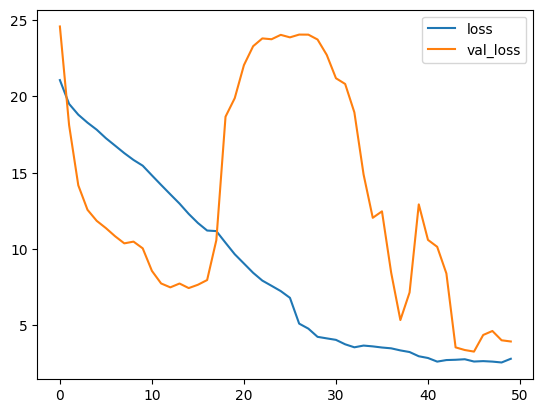

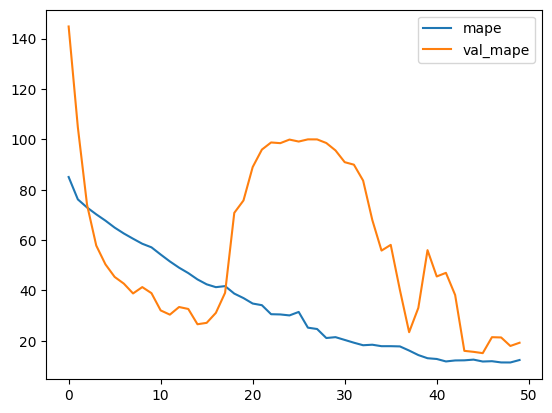

In [57]:
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['mape', 'val_mape']].plot()
plt.show()
